In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('../data/TP1_LinReg.csv')

In [2]:
df.describe()

,Unnamed: 0,ID,Inc,Gend,Age,Dist,NumC,AvgOV,Trav,Soci,Spor,TotV,Psiz,CLT,MLV,Car,Vfreq
count,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,75.500000,74.940000,0.660000,47.04000,5.986667,0.680000,30.113333,4.073333,4.033333,4.120000,115.553333,3.800000,3.820000,2.040000,0.686667,34.413333
std,43.445368,43.445368,6.784536,0.632774,15.88122,3.001089,1.038326,2.836807,1.783958,1.664540,1.809446,55.811829,1.889569,1.780091,1.824075,0.465403,15.429940
min,1.000000,1.000000,57.000000,0.000000,18.00000,1.000000,0.000000,22.000000,1.000000,1.000000,1.000000,26.000000,1.000000,1.000000,0.000000,0.000000,2.000000
25%,38.250000,38.250000,71.000000,0.000000,34.00000,3.000000,0.000000,28.000000,3.000000,3.000000,3.000000,64.000000,2.000000,2.000000,1.000000,0.000000,24.000000
50%,75.500000,75.500000,76.000000,1.000000,46.00000,6.000000,0.000000,30.000000,4.000000,4.000000,4.000000,112.000000,4.000000,4.000000,2.000000,1.000000,30.000000
75%,112.750000,112.750000,79.750000,1.000000,59.75000,9.000000,1.000000,32.000000,6.000000,5.000000,6.000000,148.750000,5.000000,5.000000,3.000000,1.000000,45.000000
max,150.000000,150.000000,91.000000,2.000000,75.00000,10.000000,5.000000,37.000000,7.000000,7.000000,7.000000,264.000000,8.000000,8.000000,10.000000,1.000000,88.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  150 non-null    int64
 1   ID          150 non-null    int64
 2   Inc         150 non-null    int64
 3   Gend        150 non-null    int64
 4   Age         150 non-null    int64
 5   Dist        150 non-null    int64
 6   NumC        150 non-null    int64
 7   AvgOV       150 non-null    int64
 8   Trav        150 non-null    int64
 9   Soci        150 non-null    int64
 10  Spor        150 non-null    int64
 11  TotV        150 non-null    int64
 12  Psiz        150 non-null    int64
 13  CLT         150 non-null    int64
 14  MLV         150 non-null    int64
 15  Car         150 non-null    int64
 16  Vfreq       150 non-null    int64
dtypes: int64(17)
memory usage: 20.0 KB


In [4]:
X = df.drop('Vfreq', axis=1)
y = df['Vfreq']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Use Recursive Feature Elimination with Cross-Validation (RFECV)
selector = RFECV(estimator=model, step=1, cv=5)
X_train_selected = selector.fit_transform(X_train, y_train)

# Train the model using the selected features
model.fit(X_train_selected, y_train)

X_test_selected = selector.transform(X_test)
y_pred = model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

optimal_num_features = selector.n_features_
print(f'Optimal Number of Features: {optimal_num_features}')

selected_features = X.columns[selector.support_]
print(f'Selected Features: {selected_features}')


Mean Squared Error: 188.90698930568422
Optimal Number of Features: 8
Selected Features: Index(['Inc', 'Dist', 'NumC', 'Trav', 'Spor', 'Psiz', 'CLT', 'Car'], dtype='object')


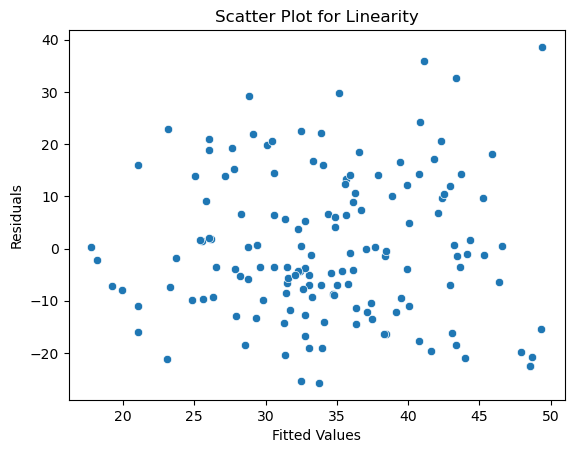

   Variable         VIF
0     const  161.344792
1       Inc    1.059578
2      Dist    1.078946
3      NumC    1.045771
4      Trav    1.055996
5      Soci    1.025665
6      Spor    1.063275
7      Psiz    1.046535
8       CLT    1.044199
9       MLV    1.074584
10      Car    1.039323


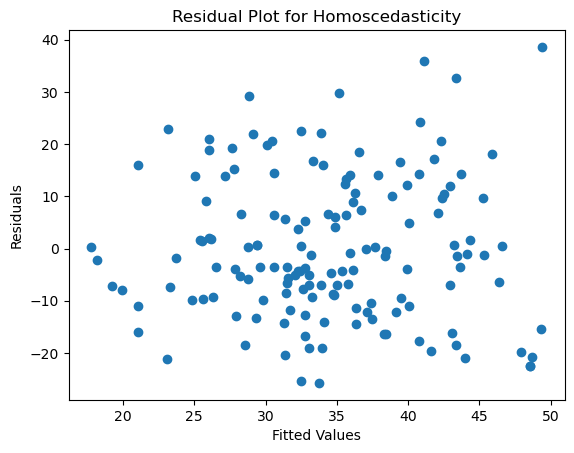

/Users/kaylaburge/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


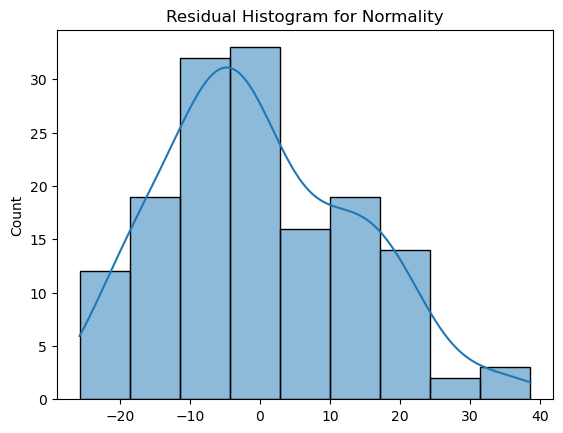

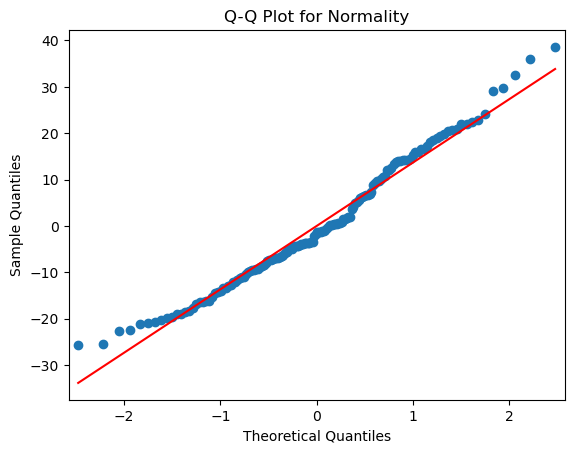

Durbin-Watson Statistic: 1.868335744781514
                            OLS Regression Results                            
Dep. Variable:                  Vfreq   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     3.707
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           0.000201
Time:                        21:55:04   Log-Likelihood:                -605.05
No. Observations:                 150   AIC:                             1232.
Df Residuals:                     139   BIC:                             1265.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

# Load your dataset
# Assuming df is your DataFrame

# Define the independent variables (X) and the dependent variable (y)
X = df[['Inc', 'Dist', 'NumC', 'Trav', 'Soci', 'Spor', 'Psiz', 'CLT', 'MLV', 'Car']]
y = df['Vfreq']

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# 1. Check for Linearity
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.title('Scatter Plot for Linearity')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# 2. Check for Multicollinearity
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# 3. Check for Homoscedasticity
plt.scatter(model.fittedvalues, model.resid)
plt.title('Residual Plot for Homoscedasticity')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# 4. Check for Normality of Residuals
sns.histplot(model.resid, kde=True)
plt.title('Residual Histogram for Normality')
plt.show()

sm.qqplot(model.resid, line='s')
plt.title('Q-Q Plot for Normality')
plt.show()

# 5. Check for Independence of Residuals
dw_stat = durbin_watson(model.resid)
print(f'Durbin-Watson Statistic: {dw_stat}')

# Print the summary of the regression model
print(model.summary())

In [6]:
gender_counts = df['Gend'].value_counts()

# Display the frequency table
print(gender_counts)

Gend
1    73
0    64
2    13
Name: count, dtype: int64


In [7]:
# Create the 'Female' column based on the condition
df['Female'] = np.where(df['Gend'] == 1, 1, 0)

# Display the frequency table for the 'Female' column
female_counts = df['Female'].value_counts()
print(female_counts)

Female
0    77
1    73
Name: count, dtype: int64


In [8]:
df.head()

,Unnamed: 0,ID,Inc,Gend,Age,Dist,NumC,AvgOV,Trav,Soci,Spor,TotV,Psiz,CLT,MLV,Car,Vfreq,Female
0,1,1,74,0,61,10,1,33,3,5,7,264,4,8,3,1,45,0
1,2,2,72,0,46,5,3,30,3,5,4,90,2,3,3,1,11,0
2,3,3,70,1,69,1,0,29,2,6,5,232,2,8,2,1,55,1
3,4,4,62,2,18,8,0,29,4,5,6,58,1,2,1,1,50,0
4,5,5,79,0,26,7,0,30,7,2,1,60,8,2,0,1,56,0


In [9]:
# Define the independent variables (X) and the dependent variable (y)
X = df[['Inc', 'Female', 'Dist', 'NumC', 'AvgOV', 'Trav', 'Soci', 'Spor', 'TotV', 'Psiz', 'CLT', 'MLV', 'Car']]
y = df['Vfreq']

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Vfreq   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2.875
Date:                Mon, 05 Feb 2024   Prob (F-statistic):            0.00108
Time:                        21:55:04   Log-Likelihood:                -604.57
No. Observations:                 150   AIC:                             1237.
Df Residuals:                     136   BIC:                             1279.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.7368     34.616     -0.224      0.8

In [10]:
# Define the independent variables (X) and the dependent variable (y)
X = df[['Inc', 'Female', 'Dist', 'NumC', 'Trav', 'Soci', 'Spor', 'TotV', 'Psiz', 'CLT', 'MLV', 'Car']]
y = df['Vfreq']

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Vfreq   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     3.137
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           0.000574
Time:                        21:55:04   Log-Likelihood:                -604.58
No. Observations:                 150   AIC:                             1235.
Df Residuals:                     137   BIC:                             1274.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.3743     14.797     -0.634      0.5

In [11]:
# Define the independent variables (X) and the dependent variable (y)
X = df[['Inc', 'Female', 'Dist', 'NumC', 'Trav', 'Soci', 'Spor', 'Psiz', 'CLT', 'MLV', 'Car']]
y = df['Vfreq']

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Vfreq   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     3.387
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           0.000357
Time:                        21:55:04   Log-Likelihood:                -604.86
No. Observations:                 150   AIC:                             1234.
Df Residuals:                     138   BIC:                             1270.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.8993     14.757     -0.603      0.5

In [12]:
# Define the independent variables (X) and the dependent variable (y)
X = df[['Inc', 'Dist', 'NumC', 'Trav', 'Soci', 'Spor', 'Psiz', 'CLT', 'MLV', 'Car']]
y = df['Vfreq']

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Vfreq   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     3.707
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           0.000201
Time:                        21:55:04   Log-Likelihood:                -605.05
No. Observations:                 150   AIC:                             1232.
Df Residuals:                     139   BIC:                             1265.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7799     14.721     -0.596      0.5